## Meat and Mortality

### Team 2 
The division of labor in our group was quite evenly divided. Since coding is quite new for all of us, we have always supported ideas of each other together. We got together and discussed analysis and design of the poster before working on the project seperatly (all of us are working parallel to the studies, so finding time to get together was not always easy) so that the workload is not always assigned to one person. Vedad helped a lot with the code, especially with the data processing. Wioleta has good knowledge in Power Point so has taken over the final revision of the poster. Suad's strength was communication, which is very important in a multi-person group.

### Secenario:
Some US and European studies suggest that long-term consumption of red meat, particularly processed meat is linked to increased risk of death due to cardiovascular disease, some types of cancer and type 2 diabetes. We will look into OECD data on meat consumption and data on causes of death per country to check some of these claims. Our first research question is to elaborate which causes of death are the most dominant among the states with high meat consumption in the period 2000 - 2015. We define the high meat consumption states as the ones that consume more than double the amount of the recommended dietary guideline intake for the subgroup meats, poultry, and eggs,  that states that you should consume not more than 0.74kg weekly( ~39kg yearly) for a healthy diet. (https://health.gov/dietaryguidelines/2015/guidelines/chapter-1/a-closer-look-inside-healthy-eating-patterns/#callout-meat-poultry ). The second question is to determine if there is a link between certain causes of death and high meat consumption.
We gathered our data from https://stats.oecd.org/ and https://data.oecd.org. The first dataset 'Meat consumption' contains the amount (in kg per capita as well as absolute tonnes) of yearly consumed meat divided into four categories beef, poultry, pig and sheep. The data set contains a total of 33 states for the years 1990 to 2027. The second dataset consists of Causes of Mortality in various OECD states as well as some non-OECD states. It contains the absolute death counts as well as standardized death counts (deaths per 100 000 population) for numerous death causes for 15 years since 2000.

### Data Sources:

Dataset 1: OECD Causes of mortality
- Creator/ authors(s) of the data set: OECD
- Names of the data repository and/or the Open Data portal used: https://stats.oecd.org
- Dataset identifier (specific to the data repository):https://stats.oecd.org/Index.aspx?QueryId=30115
- Dataset publication year: Not specified
- Last accessed (datetime of accessing, obtaining a copy of the data set): 03.05.2019

Dataset 2: Meat consumption OECD data:

- Creator/ authors(s) of the data set: OECD
- Names of the data repository and/or the Open Data portal used: https://data.oecd.org/
- Dataset identifier (specific to the data repository): OECD (2019), Meat consumption (indicator). doi: 10.1787/fa290fd0-en (Accessed on 16 April 2019)
- Dataset publication year: 2018
- Last accessed (datetime of accessing, obtaining a copy of the data set): 16.04.2019

In [3]:
# File Path:
MeatFilePath = './data/data_notebook-1_MeatConsumption.csv'
DeathFilePath = './data/data_notebook-1_causes_of_death.csv'

#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



#Opening meat consumption data using pandas read_csv function:
meat=pd.read_csv(MeatFilePath)


#Opening OECD data on Causes of mortality
death= pd.read_csv(DeathFilePath)


### Data Inspection:

In [4]:
#Inspecting the meat consumption data set:
print("Displaying the meat consumption data set columns and the number of entries: ")
meat.info()
print("Displaying the first 5 rows (meat consumption): ")
print(meat.head())
print("------------------------------------")
print("Displaying the last 5 rows (meat consumption): ")
print(meat.tail())
print("------------------------------------")

#Inspecting the causes of mortality data set: 
print("Displaying the causes of mortality data set columns and the number of entries: ")
death.info()
print("Displaying the first 5 rows (causes of mortality): ")
print(death.head())
print("------------------------------------")
print("Displaying the last 5 rows (causes of mortality): ")
print(death.tail())
print("------------------------------------")

Displaying the meat consumption data set columns and the number of entries: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11220 entries, 0 to 11219
Data columns (total 8 columns):
LOCATION      11220 non-null object
INDICATOR     11220 non-null object
SUBJECT       11220 non-null object
MEASURE       11220 non-null object
FREQUENCY     11220 non-null object
TIME          11220 non-null int64
Value         11220 non-null float64
Flag Codes    0 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 701.3+ KB
Displaying the first 5 rows (meat consumption): 
  LOCATION    INDICATOR SUBJECT MEASURE FREQUENCY  TIME      Value  Flag Codes
0      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000004         NaN
1      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.808401         NaN
2      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.278166         NaN
3      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.244478         NaN
4      AUS  MEATCONSUM

### Data Cleansing:

In [5]:
#Transforming the death dataset:
#Checking if rows "YEA" and "Year" are the same, if they are not they are appended in a lst
liste=[] #creating a list to append rows if they have different values in columns YEA and Year
for index,row in death.iterrows():
    if row["YEA"]!=row["Year"]:
        liste.append(row["Year"])
print(len(liste))
#Rows YEA and Year are the same since the list is empty
#dropping the row YEA since it has no use and dropping flag codes and flages columns
death.drop(columns=["YEA","Flag Codes","Flags"],axis=1,inplace=True)
#Saving Causes of death codes with their corresponding meaning
death_keys=death["VAR"].unique()#Keys
death_values=death["Variable"].unique()#values
death_cause_dictionary = dict(zip(death_keys, death_values))
#Saving measurement unit codes with their meaning
measure_keys=death["UNIT"].unique()#Keys
measure_values=death["Measure"].unique()#values
measure_dictionary = dict(zip(measure_keys, measure_values))

death2=death[["Country","COU","VAR","UNIT","Year","Value"]]
death2 = death2.rename(columns={'COU': 'Country Code', 'VAR': 'Death Cause Codes', 'UNIT': 'Measurement Unit Code'})
meat = meat.rename(columns={'LOCATION': 'Country Code', 'TIME': 'Year'})
#Checking which values are in the columns INDICATOR, SUBJECT, MEASURE and FREQUENCY
print("Value counts for INDICATOR column:")
print(meat["INDICATOR"].value_counts())
print("----------------------------------")
print("Value counts for SUBJECT column:")
print(meat["SUBJECT"].value_counts())
print("----------------------------------")
print("Value counts for MEASURE column:")
print(meat["MEASURE"].value_counts())
print("----------------------------------")
print("Value counts for FREQUENCY column:")
print(meat["FREQUENCY"].value_counts())
print("----------------------------------")
#columns indicator and frequency have only one variable, MEATCONSUMP and "A" frequency, these are not relevant for our analasys
meat.drop(columns=["Flag Codes","INDICATOR","FREQUENCY"],axis=1,inplace=True)

merged=death2.merge(meat,on=["Country Code","Year"])
merged.rename(columns={"Value_x":"Death Count","Value_y": "Meat Consumption","SUBJECT":"Meat Type"},inplace=True)
merged.to_csv("./data/result.csv") #saving the merged dataset as result.csv, this data set is tidy.

0
Value counts for INDICATOR column:
MEATCONSUMP    11220
Name: INDICATOR, dtype: int64
----------------------------------
Value counts for SUBJECT column:
BEEF       2805
PIG        2805
SHEEP      2805
POULTRY    2805
Name: SUBJECT, dtype: int64
----------------------------------
Value counts for MEASURE column:
THND_TONNE    5624
KG_CAP        5596
Name: MEASURE, dtype: int64
----------------------------------
Value counts for FREQUENCY column:
A    11220
Name: FREQUENCY, dtype: int64
----------------------------------


In [6]:
#Checking for missing values: 
print("Checking for missing values")
print(merged.isnull().sum())
#No missing values found

#Checking for duplicate data:
dupes=merged.duplicated()
dupe_holder=[]
for i in dupes:
    if i is True:
        dupe_holder.append(i)
print("Checking for duplicated data: ")
print("There are "+str(len(dupe_holder))+" duplicates")
print("------------------------------------")


#Querying the data:
#in the final dataset called "merged" there are categorical variables called Death Cause Code and Measurement Unit Code 
# for death counts. To save space and make the dataset more readable, we saved them and their meaning to coresponding dictionaries
# death_cause_dictionary and measure_dictionary. Their contents (meaning of the codes) will be displayed:
print("Death Cause Dictionary:")
for key,value in death_cause_dictionary.items():
    print (key,value)
print("------------------------------------")
print("Measurement Unit Dictionary:")
for key,value in measure_dictionary.items():
    print (key,value)




Checking for missing values
Country                  0
Country Code             0
Death Cause Codes        0
Measurement Unit Code    0
Year                     0
Death Count              0
Meat Type                0
MEASURE                  0
Meat Consumption         0
dtype: int64
Checking for duplicated data: 
There are 0 duplicates
------------------------------------
Death Cause Dictionary:
CICDALLC All causes of death
CICDINFE Certain infectious and parasitic diseases
CICDHIVD HIV-AIDS
CICDTUME Malignant neoplasms
CICDNCRA Malignant neoplasms of colon, rectum and anus
CICDCANC Malignant neoplasms of trachea, bronchus, lung
CICDSANG Diseases of the blood and blood-forming organs
CICDENDO Endocrine, nutritional and metabolic diseases
CICDDBTM Diabetes mellitus
CICDTROU Mental and behavioural disorders
CICDSUBS Drug use disorders
CICDNERV Diseases of the nervous system
CICDCIRC Diseases of the circulatory system
CICDISCH Ischaemic heart diseases
CICDMYOC Acute myocardial infarction


In [7]:

try:
    merged.drop(columns=["Unamed:0"],inplace=True)
except KeyError:
    print("Unnamed column already dropped")
    
dat1 = merged[(merged['Measurement Unit Code'] == 'NBPOPUPC') & (merged['MEASURE'] == 'KG_CAP') & 
              (merged['Death Cause Codes'] == 'CICDALLC' )]
dat_1 = dat1[dat1['Meat Type'] == 'BEEF']#beef
dat_2 = dat1[dat1['Meat Type'] == 'POULTRY']
dat_3 = dat1[dat1['Meat Type'] == 'PIG']
dat_4 = dat1[dat1['Meat Type'] == 'SHEEP']

sns.set()
meat = dat_1.pivot("Country Code", "Year", "Meat Consumption")
meat2 = dat_2.pivot("Country Code", "Year", "Meat Consumption")
meat3 = dat_3.pivot("Country Code", "Year", "Meat Consumption")
meat4 = dat_4.pivot("Country Code", "Year", "Meat Consumption")
meat_all = meat + meat2 + meat3 +  meat4

Unnamed column already dropped


### Queries and Data Processing:

3 countries with highest meat consumption (by mean):
Country Code
USA    97.068461
AUS    90.143241
ISR    84.943538
dtype: float64


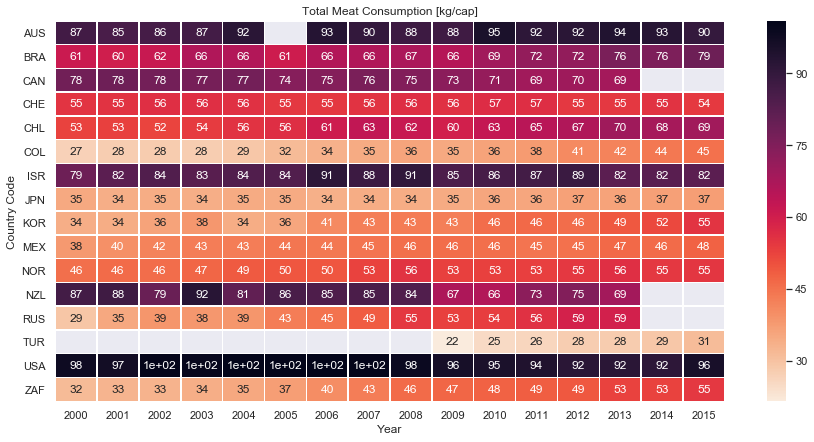

In [8]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 7))
cmap = sns.cm.rocket_r
sns.heatmap(meat_all, annot=True, linewidths=.5, ax=ax,cmap=cmap)#Heatmap of meat dataframe (BEEF and Circulatory diseases,kg_cap)
plt.title('Total Meat Consumption [kg/cap]')
plt.savefig('Heatmap.png')

meat_all_mean = meat_all.mean(axis = 1) 
meat_all_mean.sort_values()
print("3 countries with highest meat consumption (by mean):")
print(meat_all_mean.sort_values(ascending=False).head(3))

## Most dominant causes of death for the three countries with highest meat consumption

Most occured cause of death:
Diseases of the circulatory system
Second most occured cause for death:
Neoplasms
Third most occured cause for death:
Malignant neoplasms
------------------------------------
Death Cause Dictionary Meaning:
CICDALLC All causes of death
CICDINFE Certain infectious and parasitic diseases
CICDHIVD HIV-AIDS
CICDTUME Malignant neoplasms
CICDNCRA Malignant neoplasms of colon, rectum and anus
CICDCANC Malignant neoplasms of trachea, bronchus, lung
CICDSANG Diseases of the blood and blood-forming organs
CICDENDO Endocrine, nutritional and metabolic diseases
CICDDBTM Diabetes mellitus
CICDTROU Mental and behavioural disorders
CICDSUBS Drug use disorders
CICDNERV Diseases of the nervous system
CICDCIRC Diseases of the circulatory system
CICDISCH Ischaemic heart diseases
CICDMYOC Acute myocardial infarction
CICDCERV Cerebrovascular diseases
CICDREPS Diseases of the respiratory system
CICDINPN Influenza
CICDBAEM Chronic obstructive Pulmonary diseases
CICDDIGE Diseases 

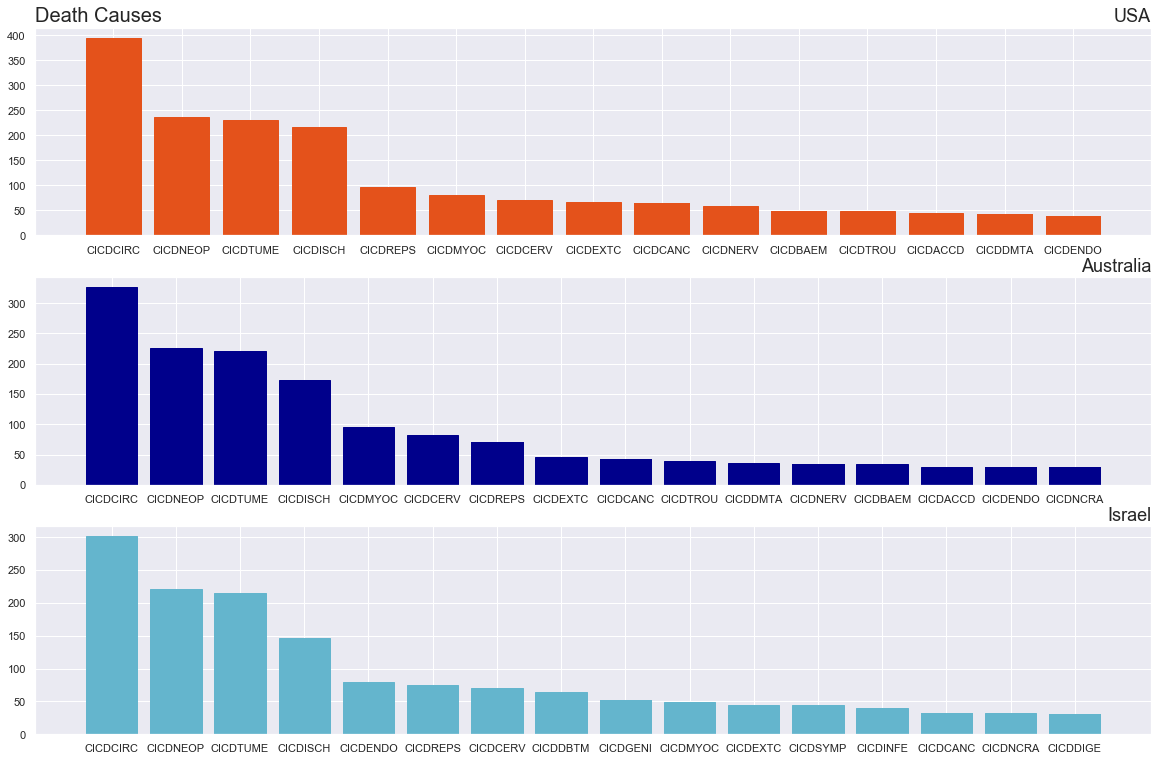

In [9]:
#Data Query: In this case the results are filtered, measurement unit KG_CAP is kept, meat type is beef, measurement unit code and numbers from all causes of death
dat0 = merged[(merged['MEASURE'] == 'KG_CAP') & 
           (merged['Meat Type'] == 'BEEF') &
           (merged['Measurement Unit Code'] == 'TXCMILTX') & 
           (merged['Death Cause Codes'] != 'CICDALLC')] #we do not need the 'all causes of death' observations
datAUS = dat0[dat0['Country'] == 'Australia']
datUSA = dat0[dat0['Country Code'] == 'USA']
datCAN = dat0[dat0['Country Code'] == 'CAN']
datISR = dat0[dat0['Country Code'] == 'ISR']

dat_AUS = datAUS.nlargest(200, ['Death Count'])
dat_USA = datUSA.nlargest(200, ['Death Count'])
dat_ISR = datISR.nlargest(200, ['Death Count'])

fig, ax1 = plt.subplots(figsize=(20,13))
plt.subplot(3,1,1)
plt.bar(dat_USA['Death Cause Codes'], dat_USA['Death Count'],color="#E4521B",edgecolor="#E4521B" )
plt.title('USA', loc = 'right', fontsize = 18)
plt.title('Death Causes', loc = 'left', fontsize = 20)
plt.subplot(3,1,2)
plt.bar(dat_AUS['Death Cause Codes'], dat_AUS['Death Count'] , color ='darkblue',edgecolor="darkblue")
plt.title('Australia', loc = 'right', fontsize = 18)
plt.subplot(3,1,3)
plt.bar(dat_ISR['Death Cause Codes'], dat_ISR['Death Count'] , color = 'c',edgecolor="c")
plt.title('Israel', loc = 'right', fontsize = 18)
plt.savefig('dom.death.png')

print('Most occured cause of death:')
print(death_cause_dictionary['CICDCIRC'])
print('Second most occured cause for death:')
print(death_cause_dictionary['CICDNEOP'])
print('Third most occured cause for death:')
print(death_cause_dictionary['CICDTUME'])
print("------------------------------------")
print("Death Cause Dictionary Meaning:")
for key,value in death_cause_dictionary.items():
    print (key,value)
print("------------------------------------")


## Correlation: causes of death and meat consumption

### Data Cleansing:

In [10]:
# We decided to do the data clensing and data query steps again and try to reshape our dataset, so we can show
# the correlations between different death causes and all the types of meat. We transformed the two original datasets,
# so the final data set (named "corr") has types of dieseases forming each row and types of meat forming the columns,
# correlation between these two variables are displayed on the crossections. 

dat_meat = pd.read_csv(MeatFilePath)

#function to count the missing values
def num_missing(x):
  return sum(x.isnull())

print("Missing values per variable:")
print (dat_meat.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each variable.
print(' ')

#there are no entries in the column FLag_Codes
# Flag_Codes can be deleted
dat_meat.drop(['Flag Codes', 'FREQUENCY', 'INDICATOR'], axis=1, inplace=True) 
#original data object is changed when inplace=True
#axis 0 = row, axis 1= column

#we only want to look at data from year 2000 to 2015
dat_meat = dat_meat[dat_meat["TIME"]>= 2000]
dat_meat = dat_meat[dat_meat["TIME"]<= 2015]

#rename the columns
dat_meat = dat_meat[['LOCATION','SUBJECT','MEASURE','TIME', 'Value']]
dat_meat.columns = ['Country Code', 'Subject', 'Measure', 'Year', 'Value']


Missing values per variable:
LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    11220
dtype: int64
 


### Queries and Data Processing:

In [11]:
# adjust data set to make analysis easier
dat_meat['subject/measure'] = dat_meat[['Subject', 'Measure']].apply(lambda x: ','.join(x), axis=1) 
dat_meat.drop(['Subject', 'Measure'], axis=1, inplace=True) 

#KG per CAPITA 
df1 = dat_meat[dat_meat['subject/measure'] == 'BEEF,KG_CAP']
df1.rename(columns={'Value': 'beef[kg/cap]'}, inplace= True)
df1.drop(['subject/measure'], axis=1, inplace=True) 

df2 = dat_meat[dat_meat['subject/measure'] == 'PIG,KG_CAP']
df2.rename(columns={'Value': 'pig[kg/cap]'}, inplace= True)
df2.drop(['subject/measure'], axis=1, inplace=True) 

df3 = dat_meat[dat_meat['subject/measure'] == 'POULTRY,KG_CAP']
df3.rename(columns={'Value': 'poultry[kg/cap]'}, inplace= True)
df3.drop(['subject/measure'], axis=1, inplace=True) 

df4 = dat_meat[dat_meat['subject/measure'] == 'SHEEP,KG_CAP']
df4.rename(columns={'Value': 'sheep[kg/cap]'}, inplace= True)
df4.drop(['subject/measure'], axis=1, inplace=True) 

df_merge1 = pd.merge(df1,df2, how="outer", on=["Country Code","Year"])
df_merge2 = pd.merge(df3,df4, how="outer", on=["Country Code","Year"])
dat_final = pd.merge(df_merge1,df_merge2, how="outer", on=["Country Code","Year"])  

#add total count of meat to data frame
dat_final['total[kg/cap]'] = dat_final['beef[kg/cap]'] + dat_final['pig[kg/cap]'] + dat_final['poultry[kg/cap]'] + dat_final['sheep[kg/cap]']
dat_final.head()

# make pivot table to get the deaths and then merge the meat consumption and death data frame
datA = merged[(merged['Measurement Unit Code'] == 'TXCMILTX') & (merged['MEASURE'] == 'KG_CAP') ] #only 
datPiv = datA.pivot_table( index = ['Country Code', 'Year'], 
                         columns = 'Death Cause Codes', 
                         values = 'Death Count')

Data = pd.merge(datPiv,dat_final, how="outer", on=["Country Code","Year"])
Data.head(5)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Country Code,Year,CICDACCD,CICDAFFE,CICDALCO,CICDALLC,CICDALZH,CICDASMA,CICDBAEM,CICDBLAD,...,CICDSYMP,CICDTBLS,CICDTRAC,CICDTROU,CICDTUME,beef[kg/cap],pig[kg/cap],poultry[kg/cap],sheep[kg/cap],total[kg/cap]
0,AUS,2000,29.8,3.3,1.5,815.7,10.6,2.7,34.4,5.2,...,3.8,0.3,10.9,19.8,221.3,26.411874,15.139784,29.224909,16.304112,87.080679
1,AUS,2001,27.1,3.3,1.3,787.9,10.4,2.5,32.6,5.6,...,3.1,0.5,10.7,17.2,219.9,24.511331,15.239281,30.802813,14.919991,85.473416
2,AUS,2002,27.2,3.3,1.5,791.2,11.6,2.3,33.6,5.5,...,4.1,0.4,10.0,19.5,218.4,25.166736,15.995141,31.528996,13.726904,86.417777
3,AUS,2003,26.7,3.1,1.3,762.2,9.8,1.7,31.4,5.1,...,4.9,0.3,9.1,19.4,212.7,25.861883,17.448409,31.502409,12.107972,86.920673
4,AUS,2004,28.0,2.9,1.2,753.4,10.4,1.8,30.0,5.1,...,5.2,0.4,8.6,20.2,212.4,28.619699,17.735478,33.833273,11.943095,92.131544


In [12]:
### choosing USA to view the correlation coefficients (Pearson's corrcoef) between meat consumption and all kinds of diseases,
DatUSA =Data[Data['Country Code'] == 'USA'] 
dat_usa=DatUSA.drop(columns=["Country Code","Year"])
corr = dat_usa.corr(method = 'pearson')
corr.drop(corr.columns[:50],inplace=True,axis=1)
#Adding explanation column, which help with undersanding the correlation matrix better
corr['Explanation'] = corr.index.map(death_cause_dictionary)
corr.drop(corr.tail(5).index,inplace=True)
corr.style.background_gradient(cmap='coolwarm')


,beef[kg/cap],pig[kg/cap],poultry[kg/cap],sheep[kg/cap],total[kg/cap],Explanation
CICDACCD,-0.675712,-0.380393,0.713452,-0.476554,-0.264431,Accidents
CICDAFFE,0.946471,0.807289,-0.0644512,0.901699,0.854895,Certain conditions originating in the perinatal period
CICDALCO,0.21588,0.399157,0.0699524,0.436998,0.296272,Alcohol use disorders
CICDALLC,0.84926,0.757054,-0.337438,0.860202,0.65674,All causes of death
CICDALZH,-0.744191,-0.382401,0.667362,-0.576243,-0.332629,Alzheimer's disease
CICDASMA,0.800812,0.675062,-0.420085,0.800867,0.564175,Asthma
CICDBAEM,0.334456,0.361433,-0.30316,0.275528,0.202321,Chronic obstructive Pulmonary diseases
CICDBLAD,-0.0499081,0.0511763,0.0786616,-0.0214483,0.0144347,Malignant neoplasms of bladder
CICDCANC,0.975818,0.753607,-0.24559,0.869414,0.780888,"Malignant neoplasms of trachea, bronchus, lung"
CICDCERV,0.834533,0.749139,-0.379186,0.853257,0.626455,Cerebrovascular diseases


In [13]:
#as we can see there is some strong correlations occuring between certain causes of death and meat consumption in the US
corr_target = abs(corr["total[kg/cap]"]) #check highest correlation of certain variable
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.8]
relevant_features

CICDAFFE    0.854895
CICDDMTA    0.807401
CICDGENI    0.928010
CICDHARM    0.817963
CICDHODG    0.847867
CICDINFE    0.896369
CICDLIVR    0.801190
CICDTRAC    0.865686
CICDTROU    0.808881
Name: total[kg/cap], dtype: float64

### Future Work:
We tried to apply all the feedback we got that was mainly forwarded towards our research questions and some graphs. We defined the too general written part of our questions, such as 'coutries with high meat consumption' (see 'Scenario').  
We also tried a different approach for our second question and showed the correlation between meat consumption and death counts in a different way as well as enhanced the representation of our graphs.  

If the same analysis would have to be conducted in one year from now, we would have to make little adaptations to the cleaning and processing steps. If the file structure do not change, there should not be a lot of effort to redo our analysis (except the issue with the SettingOnCopy Warning, that has to be solved). 

Considering the fact that we only used Person’s correlation for analysis, and some correlations may not be linear but non-linear or monotonic as future work the data could be plotted to explore any relationship that could exist and use different correlation coefficients (Gerade, Spearman). On top of that we sholud test the significance of the correlations.
Further insighs on how the meat consumption evolved over time and if it has an effect on certain causes of deaths throughout time could also be conducted using time series analysis. 

It would be also very worthwhile for future work to add new data to our already existing data set to make the analysis more insightful, for instance there is a distinction between male and female in one of our data sets that we do not use in our analysis that could be extended. Aditionally, more health related factors should be taken into account and added to the existing data to provide better comprehensible outcomes and less interpretational space.   